<a href="https://colab.research.google.com/github/balaprasanna/balautil/blob/master/balautil_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Repo for balautil package

In [0]:
# Utils
# from requestutil import *
import logging
import requests
from fastai.core import *
from wordcloud import WordCloud
from collections import Counter

## Common HTTP Util methods

In [0]:
globalheaders = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"
}

def GetRaw(url, **kwgs):
    if kwgs.get("headers"):
        headers = {**globalheaders, **kwgs.get("headers")}
    else:
        headers = globalheaders
    resp = requests.get(url, headers=headers)
    return resp


## Common Data Util methods

In [0]:
def downloaderV1(url, fname=None, folder=None):
    """
    Retirve the url content & save into file name {fname}
    """
    if not fname:
        fname = url.split("/")[-1]
    resp = GetRaw(url)
    try:
        if folder: 
          p = Path(folder); p.mkdir(exist_ok=True)
          if not str(folder).endswith("/"):
            folder = folder + "/"
          fname = folder + fname
        
        with open(fname, 'wb') as f: f.write(resp.content)
    except Exception as e:
        print("something went wrong while writing.")
        print(e)


def plotword_cloud(word_dict, figsz=(10,5)):
    """
    Plot wordcloud:
    Inputs: filename | list | frequency_dict
    """
    if isinstance(word_dict, dict):
        pass
    elif isinstance(word_dict, list):
        word_dict = Counter(data)
    elif isinstance(word_dict, str):
        fname = word_dict
        with open(fname) as f:
            data = f.read().split()
            word_dict = Counter(data)
    else:
        raise Exception("expected dict")
    wc = WordCloud()
    wc_img = wc.generate_from_frequencies(word_dict)
    plt.figure(figsize=figsz)
    plt.imshow(wc_img, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [0]:
url = 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'
downloaderV1(url, folder="data123")

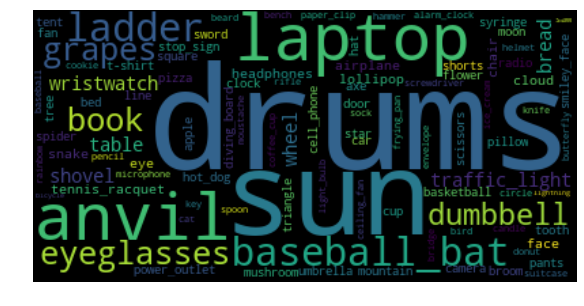

In [44]:
plotword_cloud('./data123/mini_classes.txt')

In [0]:
# p.mkdir(exist_ok=True)